In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import numpy as np

In [130]:
city_df=pd.read_excel('./Datasets/City.xlsx', sheet_name='Cities')
city_df.head(5)

,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3


In [ ]:
continent_df=pd.read_excel('./Datasets/Continent.xlsx', sheet_name='Continents')
continent_df.head(5)

,ContinentId,Continent
0,0,-
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania


In [ ]:
Country_df=pd.read_excel('./Datasets/Country.xlsx', sheet_name='Countries')
Country_df.head(5)

,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2


In [ ]:
Item_df=pd.read_excel('./Datasets/Item.xlsx')
Item_df.head(5)

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


In [ ]:
Mode_df=pd.read_excel('./Datasets/Mode.xlsx')
Mode_df.head(5)

,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends


In [ ]:
Region_df=pd.read_excel('./Datasets/Region.xlsx')
Region_df.head(5)

,Region,RegionId,ContinentId
0,-,0,0
1,Central Africa,1,1
2,East Africa,2,1
3,North Africa,3,1
4,Southern Africa,4,1


In [ ]:
Transaction_df=pd.read_excel('./Datasets/Transaction.xlsx')
Transaction_df.head(5)

KeyboardInterrupt: 

In [ ]:
Type_df=pd.read_excel('./Datasets/Type.xlsx')
Type_df.head(5)

,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets
2,13,Beaches
3,19,Caverns & Caves
4,34,Flea & Street Markets


In [ ]:
Updated_Item_df=pd.read_excel('./Datasets/Updated_Item.xlsx')
Updated_Item_df.head(5)

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


In [ ]:
User_df=pd.read_excel('./Datasets/User.xlsx')
User_df.head(5)

,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0


In [ ]:
print(Item_df.shape)
print(Updated_Item_df.shape)

(30, 5)
(1698, 5)


In [ ]:
print(Updated_Item_df.nunique())

AttractionId         1698
AttractionCityId      417
AttractionTypeId       22
Attraction           1564
AttractionAddress     442
dtype: int64


In [ ]:
Geography_df=city_df.merge(Country_df, how='inner', left_on='CountryId', right_on='CountryId').merge(Region_df,how='inner', left_on='RegionId', right_on='RegionId').merge(continent_df, how='inner', left_on='ContinentId', right_on='ContinentId')
Geography_df.sample(5)

,CityId,CityName,CountryId,Country,RegionId,Region,ContinentId,Continent
8760,8759,Preston,163,United Kingdom,21,Western Europe,5,Europe
1998,1995,Thousand Oaks,51,United States,8,Northern America,2,America
2531,2529,Ramat Gan,79,Israel,12,Middle East,3,Asia
4823,4820,Newcastle,109,Australia,15,Australia,4,Australia & Oceania
3365,3362,Labuan Island,103,Malaysia,14,South East Asia,3,Asia


In [ ]:
User_Transaction_df=User_df.merge(Transaction_df, how='inner', left_on='UserId', right_on='UserId').merge(Mode_df, how='inner', left_on='VisitMode', right_on='VisitModeId',suffixes=('_User', '_Mode')).merge(Updated_Item_df, how='inner', left_on='AttractionId', right_on='AttractionId').merge(Type_df, how='inner', left_on='AttractionTypeId', right_on='AttractionTypeId')
User_Transaction_df.head(5)

,UserId,ContinentId,RegionId,CountryId,CityId,TransactionId,VisitYear,VisitMonth,VisitMode_User,AttractionId,Rating,VisitModeId,VisitMode_Mode,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,14,5,20,155,220.0,5661,2018,12,4,640,4,4,Friends,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,16,3,14,101,3098.0,5318,2017,12,4,640,5,4,Friends,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
2,16,3,14,101,3098.0,14015,2015,8,4,640,4,4,Friends,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,65,2,8,51,800.0,6567,2018,8,4,640,5,4,Friends,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
4,129,2,8,51,950.0,12618,2015,10,4,640,4,4,Friends,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas


In [ ]:
df_merged=User_Transaction_df.merge(Geography_df, how='inner', left_on='CityId', right_on='CityId',suffixes=('_Transaction', '_Geography'))
df_merged.head(5)

,UserId,ContinentId_Transaction,RegionId_Transaction,CountryId_Transaction,CityId,TransactionId,VisitYear,VisitMonth,VisitMode_User,AttractionId,Rating,VisitModeId,VisitMode_Mode,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,CityName,CountryId_Geography,Country,RegionId_Geography,Region,ContinentId_Geography,Continent
0,14,5,20,155,220.0,5661,2018,12,4,640,4,4,Friends,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,27,NIGERIA,5,West Africa,1,Africa
1,46545,5,20,155,220.0,3269,2016,4,2,640,5,2,Couples,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,27,NIGERIA,5,West Africa,1,Africa
2,24292,1,5,27,220.0,17080,2013,1,5,640,3,5,Solo,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,27,NIGERIA,5,West Africa,1,Africa
3,14,5,20,155,220.0,67652,2018,12,4,748,5,4,Friends,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,27,NIGERIA,5,West Africa,1,Africa
4,14,5,20,155,220.0,68777,2018,12,4,748,5,4,Friends,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,27,NIGERIA,5,West Africa,1,Africa


In [ ]:
df_merged.columns

Index(['UserId', 'ContinentId_Transaction', 'RegionId_Transaction',
       'CountryId_Transaction', 'CityId', 'TransactionId', 'VisitYear',
       'VisitMonth', 'VisitMode_User', 'AttractionId', 'Rating', 'VisitModeId',
       'VisitMode_Mode', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'AttractionType', 'CityName',
       'CountryId_Geography', 'Country', 'RegionId_Geography', 'Region',
       'ContinentId_Geography', 'Continent'],
      dtype='object')

In [ ]:
df=df_merged[['UserId', 'ContinentId_Transaction', 'RegionId_Transaction',
       'CountryId_Transaction', 'CityId', 'TransactionId', 'VisitYear',
       'VisitMonth', 'VisitMode_User', 'AttractionId', 'Rating',
       'VisitMode_Mode',  'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'AttractionType', 'CityName', 'Country','Region','Continent']]
df.head(5)

,UserId,ContinentId_Transaction,RegionId_Transaction,CountryId_Transaction,CityId,TransactionId,VisitYear,VisitMonth,VisitMode_User,AttractionId,Rating,VisitMode_Mode,AttractionTypeId,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent
0,14,5,20,155,220.0,5661,2018,12,4,640,4,Friends,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,Africa
1,46545,5,20,155,220.0,3269,2016,4,2,640,5,Couples,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,Africa
2,24292,1,5,27,220.0,17080,2013,1,5,640,3,Solo,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,Africa
3,14,5,20,155,220.0,67652,2018,12,4,748,5,Friends,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,NIGERIA,West Africa,Africa
4,14,5,20,155,220.0,68777,2018,12,4,748,5,Friends,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,NIGERIA,West Africa,Africa


In [ ]:
df.rename(columns={'ContinentId_Transaction':'ContinentId', 'RegionId_Transaction':'RegionId', 'CountryId_Transaction':'CountryId', 'VisitMode_User':'VisitModeId','VisitMode_Mode':'VisitMode'}, inplace=True)

C:\Users\Chia\AppData\Local\Temp\ipykernel_10576\3112471413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'ContinentId_Transaction':'ContinentId', 'RegionId_Transaction':'RegionId', 'CountryId_Transaction':'CountryId', 'VisitMode_User':'VisitModeId','VisitMode_Mode':'VisitMode'}, inplace=True)


In [ ]:
df.sample(5)

,UserId,ContinentId,RegionId,CountryId,CityId,TransactionId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitMode,AttractionTypeId,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent
48003,60659,3,14,107,3645.0,73319,2015,10,4,748,5,Friends,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Taling Ngam,Thailand,South East Asia,Asia
50850,78557,1,4,22,203.0,146095,2017,4,4,369,2,Friends,13,Kuta Beach - Bali,Kuta,Beaches,Umhlanga,South Africa,Southern Africa,Africa
22907,82768,5,18,138,693.0,208866,2015,2,4,1278,5,Friends,45,Ullen Sentalu Museum,"Jl. Boyong Taman Wisata, 55581 Indonesia",History Museums,Atlanta,United States,Northern America,America
25070,14701,3,11,69,2298.0,1771,2019,6,3,640,5,Family,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Shanghai,China,East Asia,Asia
21109,22115,2,8,51,698.0,31898,2019,3,2,673,4,Couples,13,Seminyak Beach,Seminyak,Beaches,Austin,United States,Northern America,America


In [ ]:
df.to_csv('./Datasets/Final_Dataset.csv', index=False)

DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UserId             52922 non-null  int64  
 1   ContinentId        52922 non-null  int64  
 2   RegionId           52922 non-null  int64  
 3   CountryId          52922 non-null  int64  
 4   CityId             52922 non-null  float64
 5   TransactionId      52922 non-null  int64  
 6   VisitYear          52922 non-null  int64  
 7   VisitMonth         52922 non-null  int64  
 8   VisitModeId        52922 non-null  int64  
 9   AttractionId       52922 non-null  int64  
 10  Rating             52922 non-null  int64  
 11  VisitMode          52922 non-null  object 
 12  AttractionTypeId   52922 non-null  object 
 13  Attraction         52922 non-null  object 
 14  AttractionAddress  52922 non-null  object 
 15  AttractionType     52922 non-null  object 
 16  CityName           529

In [ ]:
df.describe()

,UserId,ContinentId,RegionId,CountryId,CityId,TransactionId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating
count,52922.000000,52922.000000,52922.000000,52922.000000,52922.000000,52922.000000,52922.000000,52922.000000,52922.000000,52922.000000,52922.000000
mean,45025.888364,3.592816,14.524470,106.297589,3398.125373,70418.108783,2016.351971,6.632497,2.945713,759.672272,4.157609
std,25072.959559,1.075385,4.186383,35.736586,2326.073352,66303.526122,1.732955,3.392764,1.000643,210.730158,0.970575
min,14.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2013.000000,1.000000,1.000000,369.000000,1.000000
25%,23470.000000,3.000000,13.000000,93.000000,1434.000000,19645.250000,2015.000000,4.000000,2.000000,640.000000,4.000000
50%,45533.500000,4.000000,15.000000,109.000000,3156.000000,42770.500000,2016.000000,7.000000,3.000000,737.000000,4.000000
75%,66670.250000,5.000000,17.000000,121.000000,4940.000000,105640.750000,2018.000000,9.000000,4.000000,841.000000,5.000000
max,88190.000000,5.000000,21.000000,164.000000,9142.000000,211241.000000,2022.000000,12.000000,5.000000,1297.000000,5.000000


In [ ]:
df.isnull().sum()

UserId               0
ContinentId          0
RegionId             0
CountryId            0
CityId               0
TransactionId        0
VisitYear            0
VisitMonth           0
VisitModeId          0
AttractionId         0
Rating               0
VisitMode            0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
CityName             0
Country              0
Region               0
Continent            0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

C:\Users\Chia\AppData\Local\Temp\ipykernel_10576\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df.shape

(52922, 20)

In [ ]:
df.dropna()

,UserId,ContinentId,RegionId,CountryId,CityId,TransactionId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitMode,AttractionTypeId,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent
0,14,5,20,155,220.0,5661,2018,12,4,640,4,Friends,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,Africa
1,46545,5,20,155,220.0,3269,2016,4,2,640,5,Couples,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,Africa
2,24292,1,5,27,220.0,17080,2013,1,5,640,3,Solo,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,Africa
3,14,5,20,155,220.0,67652,2018,12,4,748,5,Friends,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,NIGERIA,West Africa,Africa
4,14,5,20,155,220.0,68777,2018,12,4,748,5,Friends,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,NIGERIA,West Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,54258,5,21,162,7873.0,206687,2016,10,2,1238,4,Couples,2,Sewu Temple,Yogyakarta,Ancient Ruins,Venlo,Netherlands,Western Europe,Europe
52918,54258,5,21,162,7873.0,206688,2016,8,2,1238,3,Couples,2,Sewu Temple,Yogyakarta,Ancient Ruins,Venlo,Netherlands,Western Europe,Europe
52919,10365,3,11,71,2346.0,205701,2017,6,3,1225,2,Family,2,Ratu Boko Temple,Yogyakarta,Ancient Ruins,Ibaraki,Japan,East Asia,Asia
52920,50895,2,9,54,2205.0,205865,2017,10,2,1225,1,Couples,2,Ratu Boko Temple,Yogyakarta,Ancient Ruins,Sao Caetano do Sul,Brazil,South America,America


In [ ]:
df['CityId']=df['CityId'].astype('int64')

C:\Users\Chia\AppData\Local\Temp\ipykernel_10576\255409779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CityId']=df['CityId'].astype('int64')


In [ ]:
df.nunique()

UserId               33526
ContinentId              5
RegionId                22
CountryId              153
CityId                5545
TransactionId        52922
VisitYear               10
VisitMonth              12
VisitModeId              5
AttractionId            30
Rating                   5
VisitMode                5
AttractionTypeId        17
Attraction              30
AttractionAddress       25
AttractionType          17
CityName              5545
Country                151
Region                  22
Continent                6
dtype: int64

In [ ]:
# One-hot encoding categorical IDs
df_encoded = pd.get_dummies(df, columns=['Continent', 'VisitMode','AttractionTypeId'], drop_first=True)
df_encoded.head(5)


,UserId,ContinentId,RegionId,CountryId,CityId,TransactionId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent_Africa,Continent_America,Continent_Asia,Continent_Australia & Oceania,Continent_Europe,VisitMode_Couples,VisitMode_Family,VisitMode_Friends,VisitMode_Solo,AttractionTypeId_10,AttractionTypeId_13,AttractionTypeId_19,AttractionTypeId_34,AttractionTypeId_44,AttractionTypeId_45,AttractionTypeId_61,AttractionTypeId_63,AttractionTypeId_64,AttractionTypeId_72,AttractionTypeId_76,AttractionTypeId_82,AttractionTypeId_84,AttractionTypeId_91,AttractionTypeId_92,AttractionTypeId_93
0,14,5,20,155,220,5661,2018,12,4,640,4,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,46545,5,20,155,220,3269,2016,4,2,640,5,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,24292,1,5,27,220,17080,2013,1,5,640,3,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,14,5,20,155,220,67652,2018,12,4,748,5,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,NIGERIA,West Africa,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,14,5,20,155,220,68777,2018,12,4,748,5,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,NIGERIA,West Africa,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
df_encoded.columns

Index(['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId',
       'TransactionId', 'VisitYear', 'VisitMonth', 'VisitModeId',
       'AttractionId', 'Rating', 'Attraction', 'AttractionAddress',
       'AttractionType', 'CityName', 'Country', 'Region', 'Continent_Africa',
       'Continent_America', 'Continent_Asia', 'Continent_Australia & Oceania',
       'Continent_Europe', 'VisitMode_Couples', 'VisitMode_Family',
       'VisitMode_Friends', 'VisitMode_Solo', 'AttractionTypeId_10',
       'AttractionTypeId_13', 'AttractionTypeId_19', 'AttractionTypeId_34',
       'AttractionTypeId_44', 'AttractionTypeId_45', 'AttractionTypeId_61',
       'AttractionTypeId_63', 'AttractionTypeId_64', 'AttractionTypeId_72',
       'AttractionTypeId_76', 'AttractionTypeId_82', 'AttractionTypeId_84',
       'AttractionTypeId_91', 'AttractionTypeId_92', 'AttractionTypeId_93'],
      dtype='object')

In [ ]:
#creating user profile by grouping by some columns
user_profile = df.groupby('UserId').agg({
    'Rating': ['mean', 'count'],
    'VisitMode': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
}).reset_index()
user_profile.columns = ['UserId', 'AvgRating', 'NumRatings', 'PreferredVisitMode']

In [ ]:
df_encoded = df_encoded.merge(user_profile, on='UserId', how='left')

In [ ]:
pd.set_option('display.max_columns', None)
df_encoded.head(5)

,UserId,ContinentId,RegionId,CountryId,CityId,TransactionId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent_Africa,Continent_America,Continent_Asia,Continent_Australia & Oceania,Continent_Europe,VisitMode_Couples,VisitMode_Family,VisitMode_Friends,VisitMode_Solo,AttractionTypeId_10,AttractionTypeId_13,AttractionTypeId_19,AttractionTypeId_34,AttractionTypeId_44,AttractionTypeId_45,AttractionTypeId_61,AttractionTypeId_63,AttractionTypeId_64,AttractionTypeId_72,AttractionTypeId_76,AttractionTypeId_82,AttractionTypeId_84,AttractionTypeId_91,AttractionTypeId_92,AttractionTypeId_93,AvgRating,NumRatings,PreferredVisitMode
0,14,5,20,155,220,5661,2018,12,4,640,4,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,4.666667,3,Friends
1,46545,5,20,155,220,3269,2016,4,2,640,5,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,5.000000,1,Couples
2,24292,1,5,27,220,17080,2013,1,5,640,3,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Lagos,NIGERIA,West Africa,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,3.000000,1,Solo
3,14,5,20,155,220,67652,2018,12,4,748,5,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,NIGERIA,West Africa,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.666667,3,Friends
4,14,5,20,155,220,68777,2018,12,4,748,5,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Lagos,NIGERIA,West Africa,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.666667,3,Friends


In [ ]:
df_encoded.shape

(52922, 45)

In [ ]:
df_encoded.columns

Index(['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId',
       'TransactionId', 'VisitYear', 'VisitMonth', 'VisitModeId',
       'AttractionId', 'Rating', 'Attraction', 'AttractionAddress',
       'AttractionType', 'CityName', 'Country', 'Region', 'Continent_Africa',
       'Continent_America', 'Continent_Asia', 'Continent_Australia & Oceania',
       'Continent_Europe', 'VisitMode_Couples', 'VisitMode_Family',
       'VisitMode_Friends', 'VisitMode_Solo', 'AttractionTypeId_10',
       'AttractionTypeId_13', 'AttractionTypeId_19', 'AttractionTypeId_34',
       'AttractionTypeId_44', 'AttractionTypeId_45', 'AttractionTypeId_61',
       'AttractionTypeId_63', 'AttractionTypeId_64', 'AttractionTypeId_72',
       'AttractionTypeId_76', 'AttractionTypeId_82', 'AttractionTypeId_84',
       'AttractionTypeId_91', 'AttractionTypeId_92', 'AttractionTypeId_93',
       'AvgRating', 'NumRatings', 'PreferredVisitMode'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
df_encoded[['Rating', 'AvgRating', 'NumRatings']] = scaler.fit_transform(df_encoded[['Rating', 'AvgRating', 'NumRatings']])

In [ ]:
df_encoded.sample(5)

,UserId,TransactionId,VisitYear,VisitMonth,Rating,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent_Africa,Continent_America,Continent_Asia,Continent_Australia & Oceania,Continent_Europe,VisitMode_Couples,VisitMode_Family,VisitMode_Friends,VisitMode_Solo,AttractionTypeId_10,AttractionTypeId_13,AttractionTypeId_19,AttractionTypeId_34,AttractionTypeId_44,AttractionTypeId_45,AttractionTypeId_61,AttractionTypeId_63,AttractionTypeId_64,AttractionTypeId_72,AttractionTypeId_76,AttractionTypeId_82,AttractionTypeId_84,AttractionTypeId_91,AttractionTypeId_92,AttractionTypeId_93,AvgRating,NumRatings,PreferredVisitMode
23692,79553,109284,2014,12,1.00,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Religious Sites,Kota Kinabalu,Malaysia,South East Asia,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1.000000,0.000000,Friends
13353,11471,201157,2017,3,0.75,Merapi Volcano,Yogyakarta,Volcanos,Warsaw,Poland,Central Europe,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0.750000,0.017241,Family
46999,77009,2379,2018,4,0.75,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Miklavz na Dravskem Polju,Slovenia,Central Europe,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0.750000,0.034483,Couples
46611,2745,72955,2016,2,0.75,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Qingdao,China,East Asia,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.833333,0.034483,Family
20374,62907,43468,2015,12,0.25,Sanur Beach,Sanur,Beaches,Alexandria,Egypt,North Africa,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.732143,0.224138,Couples


In [ ]:
df_encoded.to_csv('./Datasets/Final_FilteredDataset.csv', index=False)

EDA

['Continent_Africa', 'Continent_America', 'Continent_Asia', 'Continent_Australia & Oceania', 'Continent_Europe']
Continent_America                16689
Continent_Asia                   15491
Continent_Australia & Oceania    10646
Continent_Europe                  8818
Continent_Africa                  1246
dtype: int64


C:\Users\Chia\AppData\Local\Temp\ipykernel_10576\1144394546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_dist.values, y=continent_dist.index, palette="viridis")


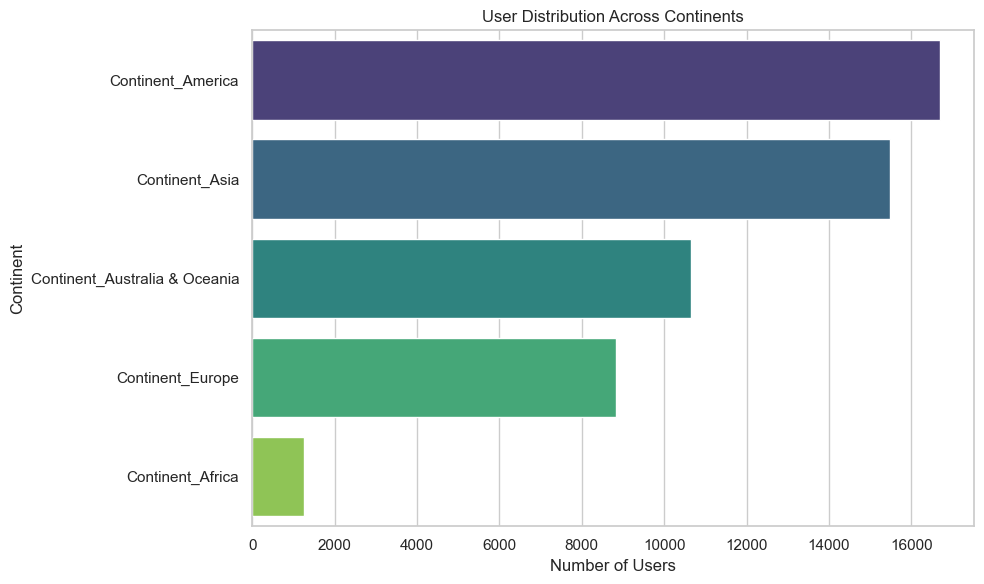

In [ ]:
#Plotting user distribution across continents
sns.set_theme(style="whitegrid")

continent_cols = [col for col in df_encoded.columns if col.startswith("Continent_")]
print(continent_cols)
continent_dist = df_encoded[continent_cols].sum().sort_values(ascending=False)
print(continent_dist)

plt.figure(figsize=(10, 6))
sns.barplot(x=continent_dist.values, y=continent_dist.index, palette="viridis")
plt.title("User Distribution Across Continents")
plt.xlabel("Number of Users")
plt.ylabel("Continent")
plt.tight_layout()
plt.show()

C:\Users\Chia\AppData\Local\Temp\ipykernel_10576\92192477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_dist.values, y=country_dist.index, palette="viridis")


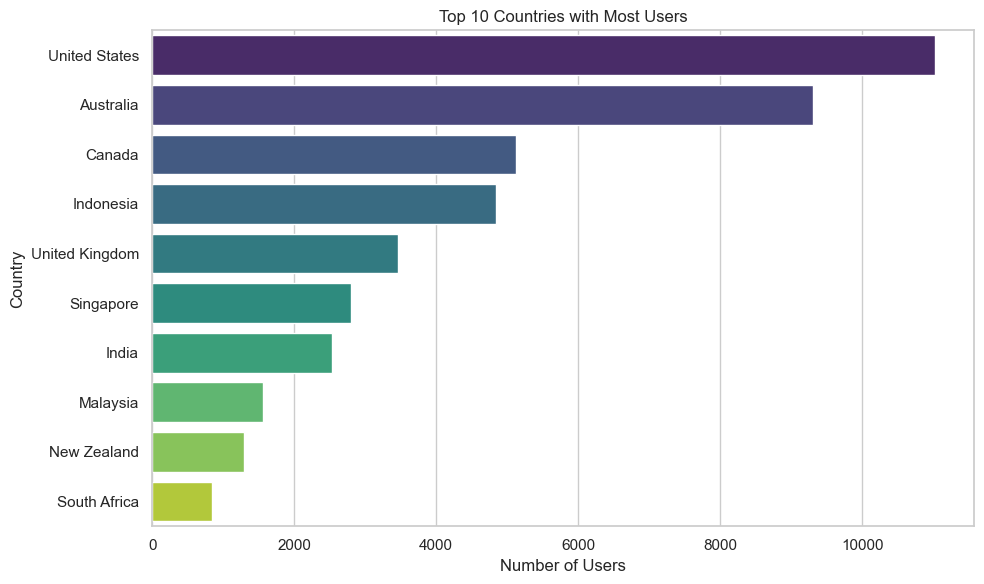

In [ ]:
#User distribution across countries
country_dist = df_encoded['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_dist.values, y=country_dist.index, palette="viridis")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\Chia\AppData\Local\Temp\ipykernel_16720\2171077723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_dist.values, y=region_dist.index, palette="viridis")


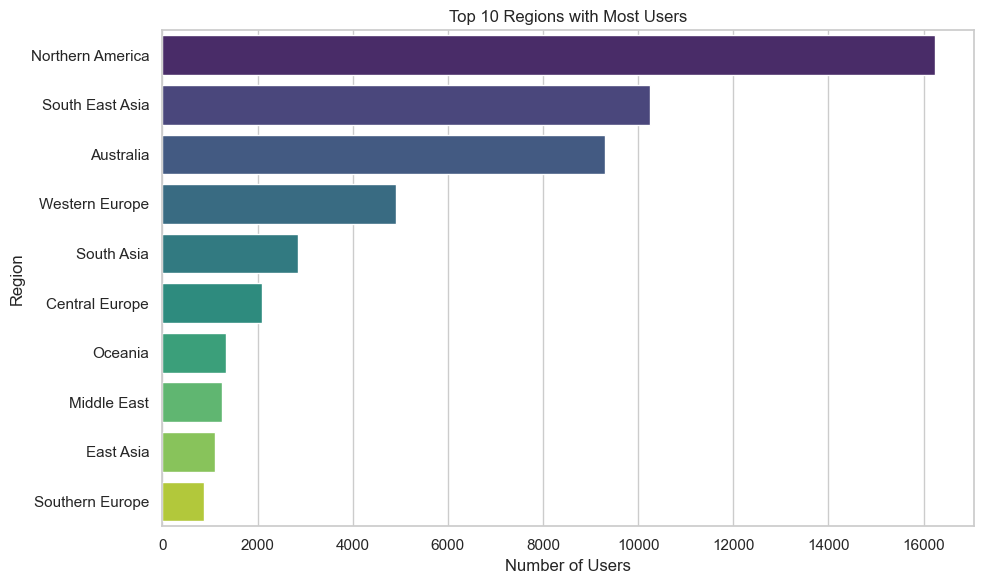

In [ ]:
# plotting user distribution across regions
region_dist=df_encoded['Region'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_dist.values, y=region_dist.index, palette="viridis")
plt.title("Top 10 Regions with Most Users")
plt.xlabel("Number of Users")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

C:\Users\Chia\AppData\Local\Temp\ipykernel_16720\3037923025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attraction_ratings.index, y=attraction_ratings.values, palette="coolwarm")


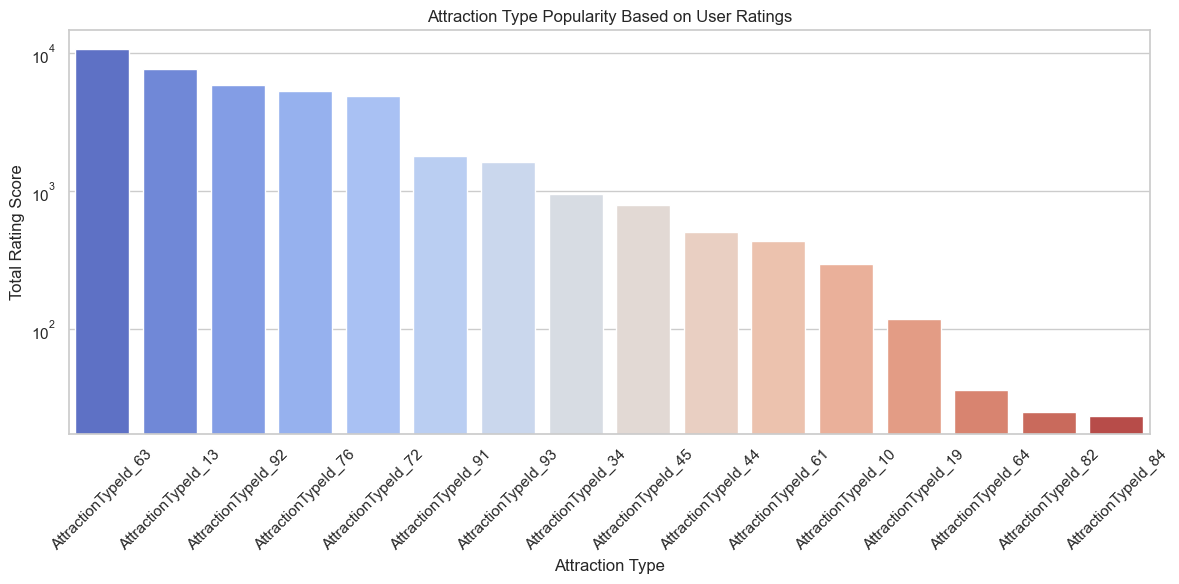

In [ ]:
#plotting popularity of attraction types by user ratings
#finding weighted sums of the ratings based on the attraction types
attraction_cols = [col for col in df_encoded.columns if col.startswith("AttractionTypeId_")]
attraction_ratings = df_encoded[attraction_cols].T @ df_encoded["Rating"]
attraction_ratings = attraction_ratings.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=attraction_ratings.index, y=attraction_ratings.values, palette="coolwarm")
plt.yscale("log") #adding log to the y axis to cover the wide range of values of attraction type ids
plt.title("Attraction Type Popularity Based on User Ratings")
plt.xlabel("Attraction Type")
plt.ylabel("Total Rating Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

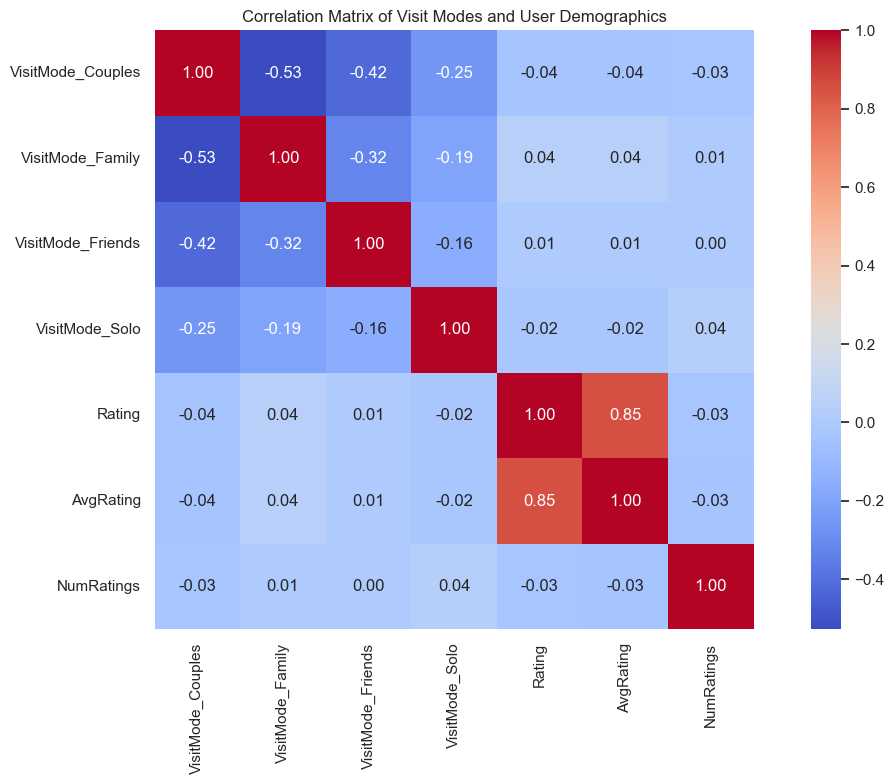

In [ ]:
#Finding corelation between visit modes and user demographics
corr_cols=[col for col in df_encoded.columns if col.startswith("VisitMode_")]
corr_cols+=['Rating', 'AvgRating', 'NumRatings']
corr_matrix = df_encoded[corr_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Visit Modes and User Demographics")
plt.tight_layout()
plt.show()

C:\Users\Chia\AppData\Local\Temp\ipykernel_16720\1655365338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Attraction', data=popular_attractions, palette="viridis")


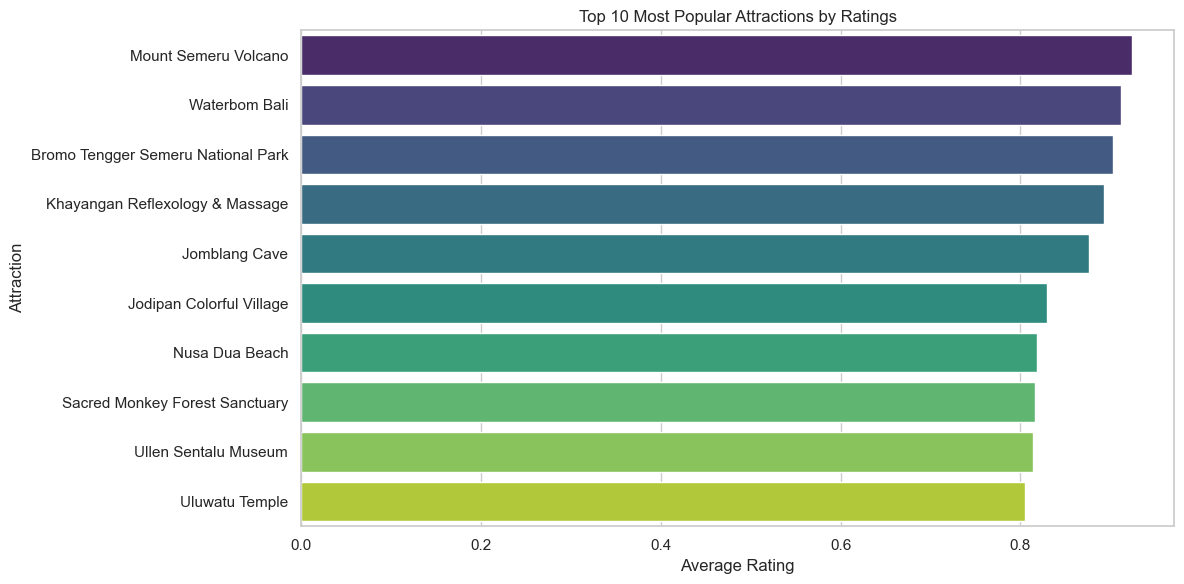

In [ ]:
#plotting teh most popular attractions by user ratings
popular_attractions = df_encoded.groupby('Attraction').agg({'Rating': 'mean', 'NumRatings': 'count'}).reset_index()
popular_attractions = popular_attractions.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Attraction', data=popular_attractions, palette="viridis")
plt.title("Top 10 Most Popular Attractions by Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Attraction")
plt.tight_layout()
plt.show()

Regression: Predicting Attraction Ratings


In [126]:
df_model = df_encoded.copy()
for col in ['Country', 'Region', 'CityName','PreferredVisitMode']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])


In [127]:
attractions_col=[col for col in df_model.columns if col.startswith("AttractionTypeId_")]
features = [
    'VisitYear', 'VisitMonth',
    'Continent_Africa', 'Continent_America', 'Continent_Asia',
    'Continent_Australia & Oceania', 'Continent_Europe',
    'Region', 'Country', 'CityName', 
    'VisitMode_Couples', 'VisitMode_Family', 'VisitMode_Friends', 'VisitMode_Solo',
    'AvgRating', 'NumRatings',
]
features.extend(attractions_col)
X_regg=df_model[features]
y_regg=df_model['Rating']
X_train, X_test, y_train, y_test = train_test_split(X_regg, y_regg, test_size=0.2, random_state=42)
rf_regg = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_leaf=4,max_features='sqrt', random_state=42)
rf_regg.fit(X_train, y_train)
y_pred = rf_regg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.02


In [128]:
# Checking for overfitting
y_train_pred = rf_regg.predict(X_train)
y_test_pred = rf_regg.predict(X_test)

# Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")


Training MSE: 0.0181
Test MSE: 0.0188


In [131]:
joblib.dump(rf_regg, "regression_model.pkl")

['regression_model.pkl']

Classification: User Visit Mode Prediction

In [142]:
df_class = df_model.copy()
df_class.drop(columns=['UserId', 'TransactionId', 'Attraction', 'AttractionAddress', 'AttractionType'], inplace=True)
X_class = df_class.drop(columns=['PreferredVisitMode','CombinedFeatures'])
y_class = df_class['PreferredVisitMode']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 2]
}
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax')
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_class, y_train_class)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
best_clf = grid_search.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [10:38:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.7}
Best Cross-Validation Score: 0.9315


In [143]:
# Predictions
y_train_pred_class = best_clf.predict(X_train_class)
y_test_pred_class = best_clf.predict(X_test_class)
mse_train_class = mean_squared_error(y_train_class, y_train_pred_class)
mse_test_class = mean_squared_error(y_test_class, y_test_pred_class)
print(f"Training MSE: {mse_train_class:.4f}")
print(f"Test MSE: {mse_test_class:.4f}")

Training MSE: 0.0757
Test MSE: 0.1929


In [144]:
joblib.dump(grid_search, "classification_model.pkl")

['classification_model.pkl']

RECOMMENDER SYSTEM


In [170]:
df1=pd.read_csv('./Datasets/Final_Dataset.csv')

In [ ]:
# 1. Create User-Item-Rating matrix
user_item_rating_df = df1[['UserId', 'Attraction', 'Rating']].drop_duplicates()

# 2. Create Attraction Features dataframe
attraction_features_df = df1[['Attraction', 'AttractionType', 'CityName', 'Country', 'Region', 'Continent']].drop_duplicates()

user_item_rating_df.to_csv('./Datasets/User_Item_Rating.csv')
attraction_features_df.to_csv( './Datasets/Attraction_Features.csv')

In [ ]:
# Assume user-item ratings matrix (user_id as index, attraction names as columns)
user_item_matrix = pd.read_csv('./Datasets/User_Item_Rating.csv')

# Assume attraction metadata (attraction name, type, location, etc.)
attraction_data = pd.read_csv('./Datasets/Attraction_Features.csv')

# Fill NaNs with 0 (treat as no rating)
user_item_matrix_filled = user_item_matrix.fillna(0)
user_item_matrix_filled.head(5)

,Unnamed: 0,UserId,Attraction,Rating
0,0,14,Sacred Monkey Forest Sanctuary,4
1,1,46545,Sacred Monkey Forest Sanctuary,5
2,2,24292,Sacred Monkey Forest Sanctuary,3
3,3,14,Tegalalang Rice Terrace,5
4,5,45557,Tegalalang Rice Terrace,3


COLLABORATIVE RECOMMENDER


In [182]:
df_model_agg = df_model.groupby(['UserId', 'Attraction'])['Rating'].mean().reset_index()

# Now pivot to create the user-item matrix
user_item_matrix = df_model_agg.pivot(index='UserId', columns='Attraction', values='Rating')

# Fill missing values with 0
user_item_matrix_filled = user_item_matrix.fillna(0)

print("User-Item Matrix ready for collaborative filtering:")
print(user_item_matrix_filled.head())

User-Item Matrix ready for collaborative filtering:
Attraction  Balekambang Beach  Bromo Tengger Semeru National Park  \
UserId                                                              
14                        0.0                                 0.0   
16                        0.0                                 0.0   
20                        0.0                                 0.0   
23                        0.0                                 0.0   
25                        0.0                                 1.0   

Attraction  Coban Rondo Waterfall  Goa Cina Beach  Jodipan Colorful Village  \
UserId                                                                        
14                            0.0             0.0                       0.0   
16                            0.0             0.0                       0.0   
20                            0.0             0.0                       0.0   
23                            0.0             0.0                    

In [ ]:
# Step 1: Compute cosine similarity between users
similarity_matrix = cosine_similarity(user_item_matrix_filled)

# Step 2: Convert to DataFrame with proper user IDs
similarity_df = pd.DataFrame(
    similarity_matrix, 
    index=user_item_matrix_filled.index, 
    columns=user_item_matrix_filled.index
)

def recommend_collaborative(user_id, user_item_matrix, similarity_df):
    if user_id not in user_item_matrix.index:
        print(f"User {user_id} not found in data.")
        return pd.DataFrame()

    sim_scores = similarity_df[user_id].drop(user_id)  # drop self-similarity

    # Align sim_scores index with user_item_matrix columns (after .T)
    sim_scores_aligned = sim_scores.reindex(user_item_matrix.index, fill_value=0)

    # Ratings of all users
    ratings = user_item_matrix

    # Weighted sum of ratings from similar users
    weighted_ratings = ratings.T.dot(sim_scores_aligned)

    # Normalize by total similarity scores
    similarity_sums = sim_scores_aligned.sum()
    if similarity_sums == 0:
        print(f"No similar users found for User {user_id}.")
        return pd.DataFrame()

    predicted_ratings = weighted_ratings / similarity_sums

    # Remove already rated attractions
    already_rated = ratings.loc[user_id][ratings.loc[user_id] > 0].index
    predicted_ratings = predicted_ratings.drop(already_rated, errors='ignore')

    return predicted_ratings.sort_values(ascending=False).head(5)


In [254]:
user_id = 14
recommendations = recommend_collaborative(user_id, user_item_matrix_filled, similarity_df)
print("Top Recommendations for User", user_id)
print(recommendations)


Top Recommendations for User 14
Attraction
Tegenungan Waterfall    0.051160
Waterbom Bali           0.045256
Tanah Lot Temple        0.039548
Uluwatu Temple          0.035869
Sanur Beach             0.025018
dtype: float64


In [193]:
# Create a 'features' column by joining relevant fields into a single text
attraction_features_df['features'] = attraction_features_df[['AttractionType', 'CityName', 'Country', 'Region', 'Continent']].agg(' '.join, axis=1)


In [249]:
def recommend_content_based(user_id, user_item_matrix, attraction_data):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import linear_kernel

    # Combine attraction features
    attraction_data['features'] = (
        attraction_data['AttractionType'].fillna('') + ' ' +
        attraction_data['CityName'].fillna('') + ' ' +
        attraction_data['Region'].fillna('') + ' ' +
        attraction_data['Country'].fillna('') + ' ' +
        attraction_data['Continent'].fillna('')
    )

    # Create TF-IDF matrix
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(attraction_data['features'])

    # Indexing by attraction name
    indices = pd.Series(attraction_data.index, index=attraction_data['Attraction'])

    # Get attractions liked by the user (rated >= 4)
    liked_attractions = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] >= 4].index.tolist()
    if not liked_attractions:
        print("No liked attractions found. Showing popular attractions instead.")
        fallback = attraction_data[['Attraction']].copy()
        return fallback.head(5)

    # Find indices of liked attractions
    liked_indices = [indices[att] for att in liked_attractions if att in indices]

    # Compute similarity scores
    sim_scores = linear_kernel(tfidf_matrix[liked_indices], tfidf_matrix)
    sim_scores = sim_scores.mean(axis=0)  # average if multiple liked attractions

    # Get top N recommendations (excluding liked attractions)
    top_indices = sim_scores.argsort()[::-1]
    recommended_indices = [i for i in top_indices if attraction_data['Attraction'][i] not in liked_attractions]

    # Create result DataFrame
    recommended_attractions = attraction_data['Attraction'].iloc[recommended_indices[:5]].reset_index(drop=True)
    result_df = pd.DataFrame({'Attraction': recommended_attractions})

    return result_df


In [250]:
user_id = 14
content_df = recommend_content_based(user_id,  user_item_matrix, attraction_data)
print("Top Recommendations for User", user_id)
print(content_df)

No liked attractions found. Showing popular attractions instead.
Top Recommendations for User 14
                       Attraction
0  Sacred Monkey Forest Sanctuary
1         Tegalalang Rice Terrace
2               Kuta Beach - Bali
3                     Sanur Beach
4                Tanah Lot Temple


In [247]:
def hybrid_recommendation_from_outputs(collab_series, content_df, alpha=0.6):
    # Step 1: Ensure collaborative results are in DataFrame format with string attraction names
    collab_df = collab_series.reset_index()
    collab_df.columns = ['Attraction', 'PredictedRating_collab']
    collab_df['Attraction'] = collab_df['Attraction'].astype(str)

    # Step 2: Clean and prepare content-based recommendations
    content_df = content_df.drop_duplicates()
    content_df['Attraction'] = content_df['Attraction'].astype(str)
    content_df['PredictedRating_content'] = 1.0  # Assign max default score

    # Step 3: Merge on Attraction
    merged = pd.merge(collab_df, content_df, on='Attraction', how='outer')
    merged['PredictedRating_collab'].fillna(0, inplace=True)
    merged['PredictedRating_content'].fillna(0, inplace=True)

    # Explicitly convert to float
    merged['PredictedRating_collab'] = pd.to_numeric(merged['PredictedRating_collab'], errors='coerce').fillna(0)
    merged['PredictedRating_content'] = pd.to_numeric(merged['PredictedRating_content'], errors='coerce').fillna(0)
    merged['HybridScore'] = alpha * merged['PredictedRating_collab'] + (1 - alpha) * merged['PredictedRating_content']


    # Step 5: Return top recommendations
    result = merged[['Attraction', 'HybridScore']].sort_values(by='HybridScore', ascending=False).reset_index(drop=True)
    return result.head(10)


In [268]:
hybrid_recs = hybrid_recommendation_from_outputs(recommendations, content_df, alpha=0.55)
print("Top Hybrid Recommendations:")
print(hybrid_recs)


Top Hybrid Recommendations:
                       Attraction  HybridScore
0                Tanah Lot Temple     0.471752
1                     Sanur Beach     0.463760
2  Sacred Monkey Forest Sanctuary     0.450000
3         Tegalalang Rice Terrace     0.450000
4               Kuta Beach - Bali     0.450000
5            Tegenungan Waterfall     0.028138
6                   Waterbom Bali     0.024891
7                  Uluwatu Temple     0.019728


In [269]:
def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]
    score, hits = 0.0, 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            hits += 1.0
            score += hits / (i + 1.0)
    return score / min(len(actual), k) if actual else 0.0

def mapk(actual_dict, predicted_dict, k=10):
    return np.mean([apk(actual_dict[u], predicted_dict.get(u, []), k)
                    for u in actual_dict])


In [ ]:
def compute_rmse(actual_ratings_df, predicted_ratings_df):
    """
    Both DataFrames must have: ['user_id', 'item_id', 'rating']
    """
    merged = actual_ratings_df.merge(predicted_ratings_df,
                                     on=['user_id', 'item_id'],
                                     suffixes=('_actual', '_predicted'))
    return np.sqrt(mean_squared_error(merged['rating_actual'], merged['rating_predicted']))
